In [7]:
import numpy as np
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
baza=pd.read_csv("Netflix_all.csv")


In [8]:
seznam={}
for jak,avg in baza[["listed_in"]].iterrows():
    for name in avg:
        splitansez=name.split(", ")
        for sp in splitansez:
            if sp not in seznam:
                seznam[sp]=[]

In [9]:
len(seznam.keys())

42

In [10]:
bb = baza.sort_values(by=['numVotes'], ascending=False)

In [11]:
najboljpopularni=bb.head(100)

In [12]:
from Orange.data.pandas_compat import table_from_frame
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [13]:
brek=[]
for index, row in najboljpopularni.iterrows():
    for zanr in row['listed_in'].split(", "):
        najboljpopularni.loc[index, zanr] = int(1)
najboljpopularni = najboljpopularni.drop(columns=[ 'type', 'show_id', 'director', 'cast','country','date_added','release_year','rating','duration','listed_in','description','averageRating','numVotes','month_added','year_added']).fillna(0)
data = table_from_frame(najboljpopularni)

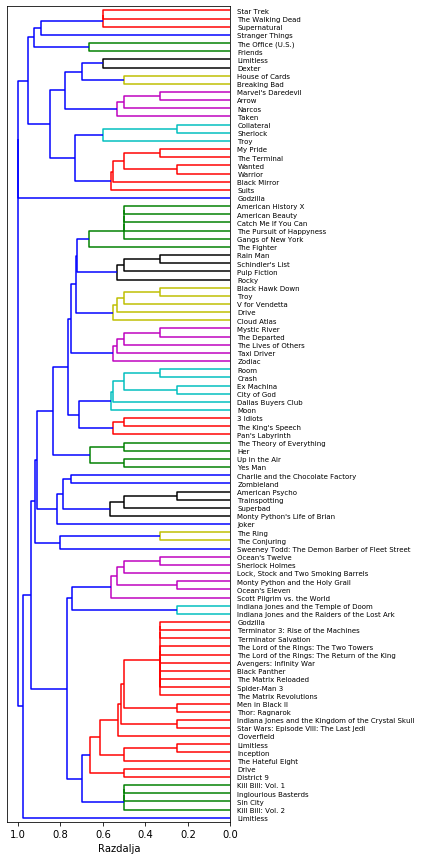

In [14]:
X = data.X
Y = data.Y

L = sch.linkage(X, method="average", metric="jaccard")

plt.figure(figsize=(4, 15))
labels = [row["title"].value for row in data]
D      = sch.dendrogram(L, labels=labels, leaf_font_size=7, orientation='left')
plt.xlabel("Razdalja")
plt.show()